In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/burnout-datathon-ieeecsmuj/sample_submission.csv
/kaggle/input/burnout-datathon-ieeecsmuj/val.csv
/kaggle/input/burnout-datathon-ieeecsmuj/train.csv
/kaggle/input/burnout-datathon-ieeecsmuj/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df=pd.read_csv('/kaggle/input/burnout-datathon-ieeecsmuj/train.csv')
train_df

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,...,23,35,53,45,41,4,0,2018,2021,4
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,...,12,12,27,27,22,2,1,1975,1983,8
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,...,22,23,45,43,10,0,0,1982,1989,8
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,...,23,35,192,172,155,16,9,1994,2009,16
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,...,22,31,175,146,132,29,17,2011,2021,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914051,1995189,8740,MotoGP,5.108,20,8,175.84,Wet,75,Medium,...,12,12,5,5,3,0,0,2021,2021,1
1914052,1770460,5002,MotoGP,5.456,20,15,237.02,Wet,35,Soft,...,21,21,31,23,12,0,0,2019,2021,3
1914053,992076,2913,MotoGP,4.327,24,11,347.70,Dry,71,Medium,...,21,31,258,214,199,30,15,2006,2021,16
1914054,2380139,9438,MotoGP,3.708,23,20,291.95,Wet,70,Hard,...,27,46,44,33,12,0,0,2000,2008,6


In [4]:
test_df=pd.read_csv('/kaggle/input/burnout-datathon-ieeecsmuj/test.csv')
test_df

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,288307,6533,MotoGP,5.316,19,1,284.38,Dry,44,Hard,...,16,19,92,86,47,2,0,1981,1993,13
1,704288,4800,Moto2,3.861,19,2,328.98,Dry,43,Hard,...,28,47,406,373,365,178,111,1996,2021,26
2,951491,7907,Moto3,3.954,18,21,165.56,Dry,77,Soft,...,27,46,138,134,120,13,7,1993,2007,15
3,2591721,4844,Moto3,4.074,21,21,258.46,Dry,74,Medium,...,21,29,83,70,37,0,0,1998,2007,10
4,1202653,4802,Moto2,4.096,25,21,319.60,Dry,84,Hard,...,27,46,134,115,105,5,2,1998,2010,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546869,1713604,4335,Moto3,5.566,24,4,341.52,Wet,49,Hard,...,28,47,7,6,3,0,0,1999,2003,4
546870,912615,8325,Moto2,5.093,18,7,248.62,Dry,68,Medium,...,22,31,136,106,76,7,3,2002,2015,14
546871,1074664,5692,Moto2,5.775,21,16,277.54,Wet,37,Medium,...,22,31,3,3,0,0,0,1999,2003,3
546872,1267178,9389,Moto2,4.850,22,6,338.44,Wet,63,Hard,...,28,47,45,43,35,0,0,1994,1998,5


In [5]:
val_df=pd.read_csv('/kaggle/input/burnout-datathon-ieeecsmuj/val.csv')
val_df

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1733872,6065,Moto2,4.248,24,5,293.12,Wet,33,Hard,...,22,31,54,54,49,15,6,1966,1970,5
1,1778161,5781,Moto2,4.907,20,2,310.31,Wet,32,Soft,...,26,35,120,110,89,4,1,1996,2005,10
2,1205004,3780,Moto2,4.162,24,15,237.39,Wet,89,Medium,...,28,47,290,262,258,105,54,2001,2021,19
3,578473,8193,MotoGP,3.889,18,3,275.55,Wet,32,Soft,...,22,31,134,115,105,5,2,1998,2010,13
4,2248803,1632,Moto2,4.088,24,19,297.81,Wet,59,Soft,...,26,35,106,86,45,1,0,2010,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273432,1906151,7777,MotoGP,3.726,25,18,309.09,Dry,48,Hard,...,22,31,163,144,140,62,45,2001,2012,12
273433,770254,1310,Moto2,4.820,22,13,321.30,Wet,62,Hard,...,12,12,192,179,164,42,22,1997,2015,15
273434,1417001,5851,Moto2,4.827,20,16,223.36,Dry,62,Hard,...,26,35,19,17,5,0,0,1998,2001,4
273435,2245360,4265,Moto3,5.586,19,2,309.03,Wet,50,Medium,...,21,31,55,55,46,5,3,1979,1989,11


In [6]:
train_df.isnull().sum()

Unique ID                               0
Rider_ID                                0
category_x                              0
Circuit_Length_km                       0
Laps                                    0
Grid_Position                           0
Avg_Speed_kmh                           0
Track_Condition                         0
Humidity_%                              0
Tire_Compound_Front                     0
Tire_Compound_Rear                      0
Penalty                            321292
Championship_Points                     0
Championship_Position                   0
Session                                 0
year_x                                  0
sequence                                0
rider                                   0
team                                    0
bike                                    0
position                                0
points                                  0
shortname                               0
circuit_name                      

In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 45 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition                  object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rear               object 
 11  Penalty                          object 
 12  Championship_Points              int64  
 13  Championship_Position            int64  
 14  Session                          object 
 15  year_x                           int64  
 16  sequence                         int64  
 17  rider   

In [25]:
train1_df=pd.read_csv('/kaggle/input/burnout-datathon-ieeecsmuj/train.csv')

# HISTOGRAM

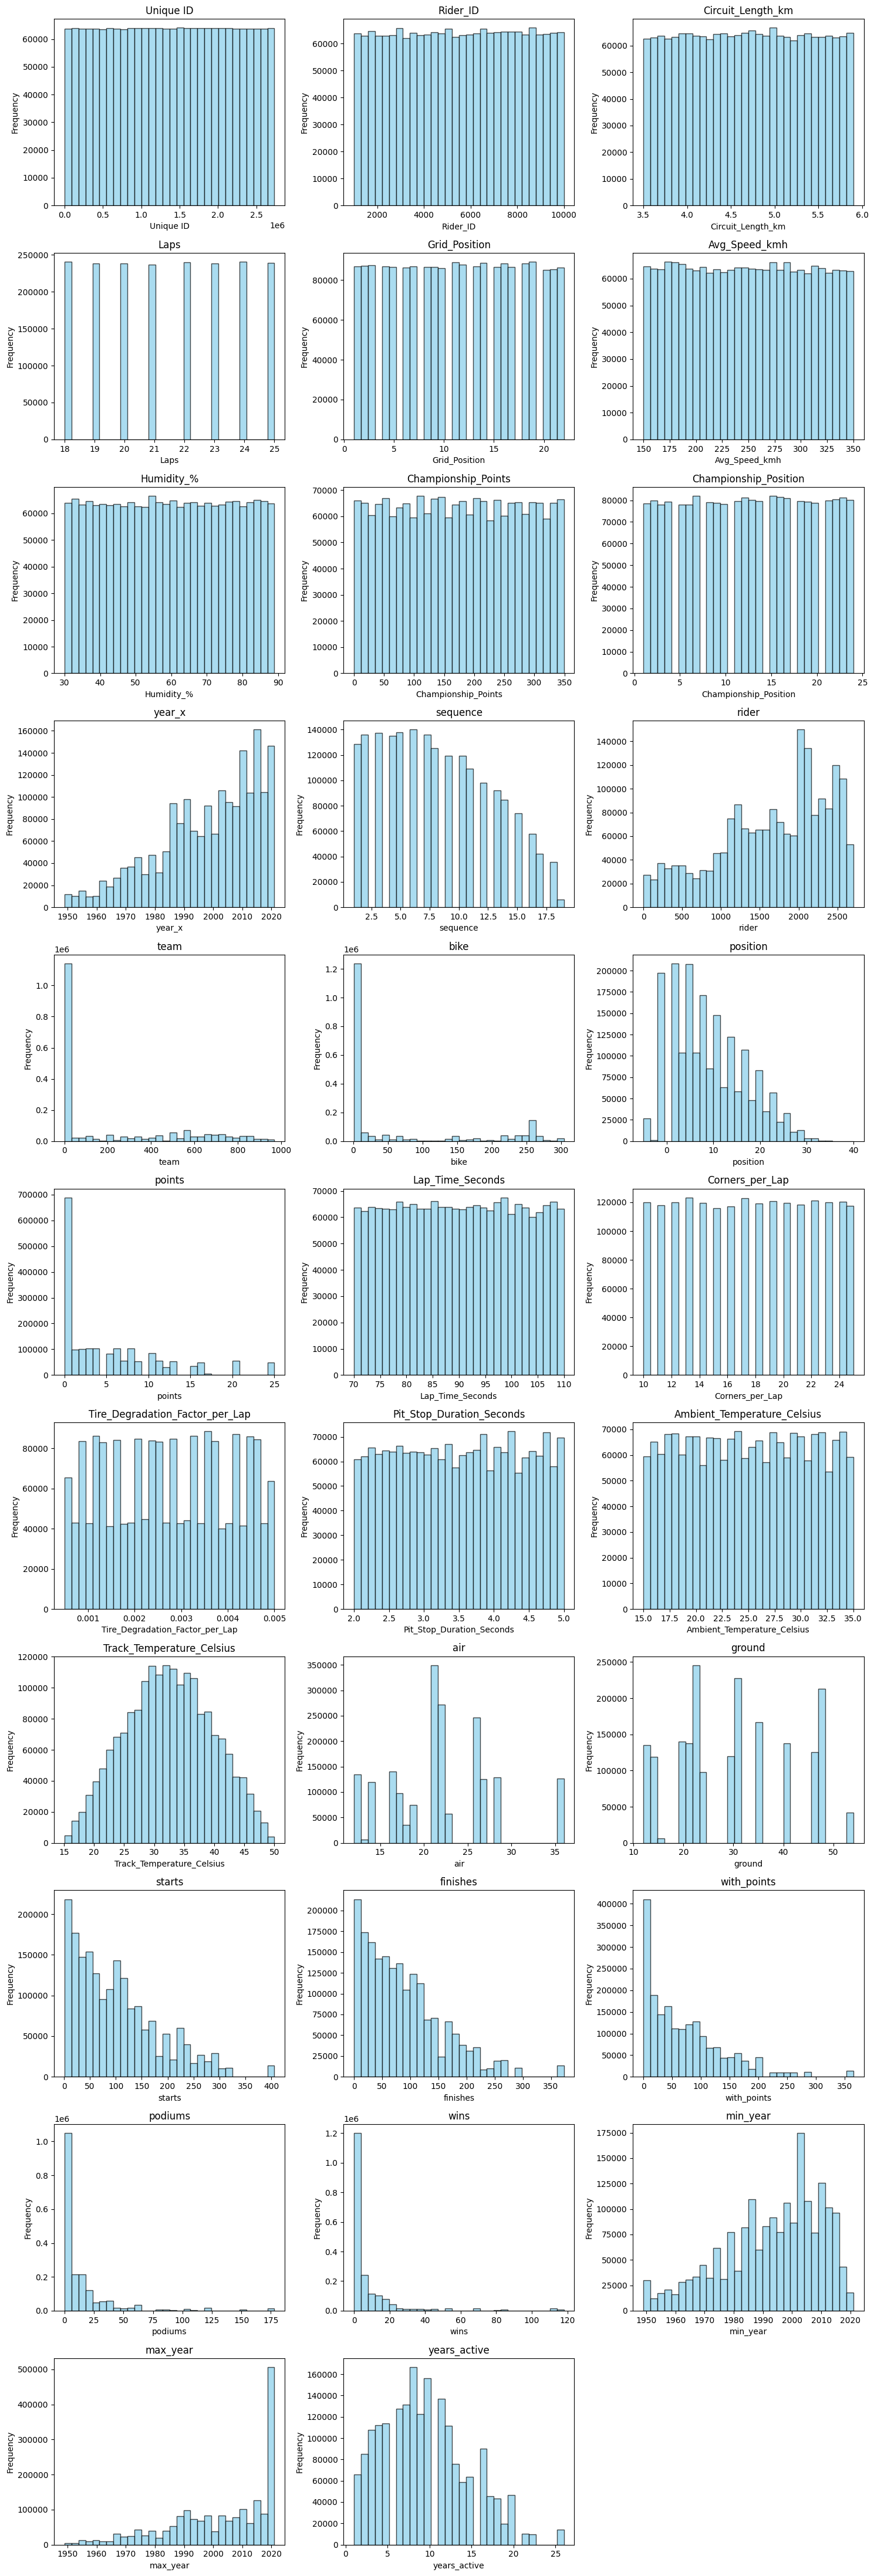

In [26]:
numerical_cols = train1_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.ravel() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols):
    axes[i].hist(train1_df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# BOXPLOTS

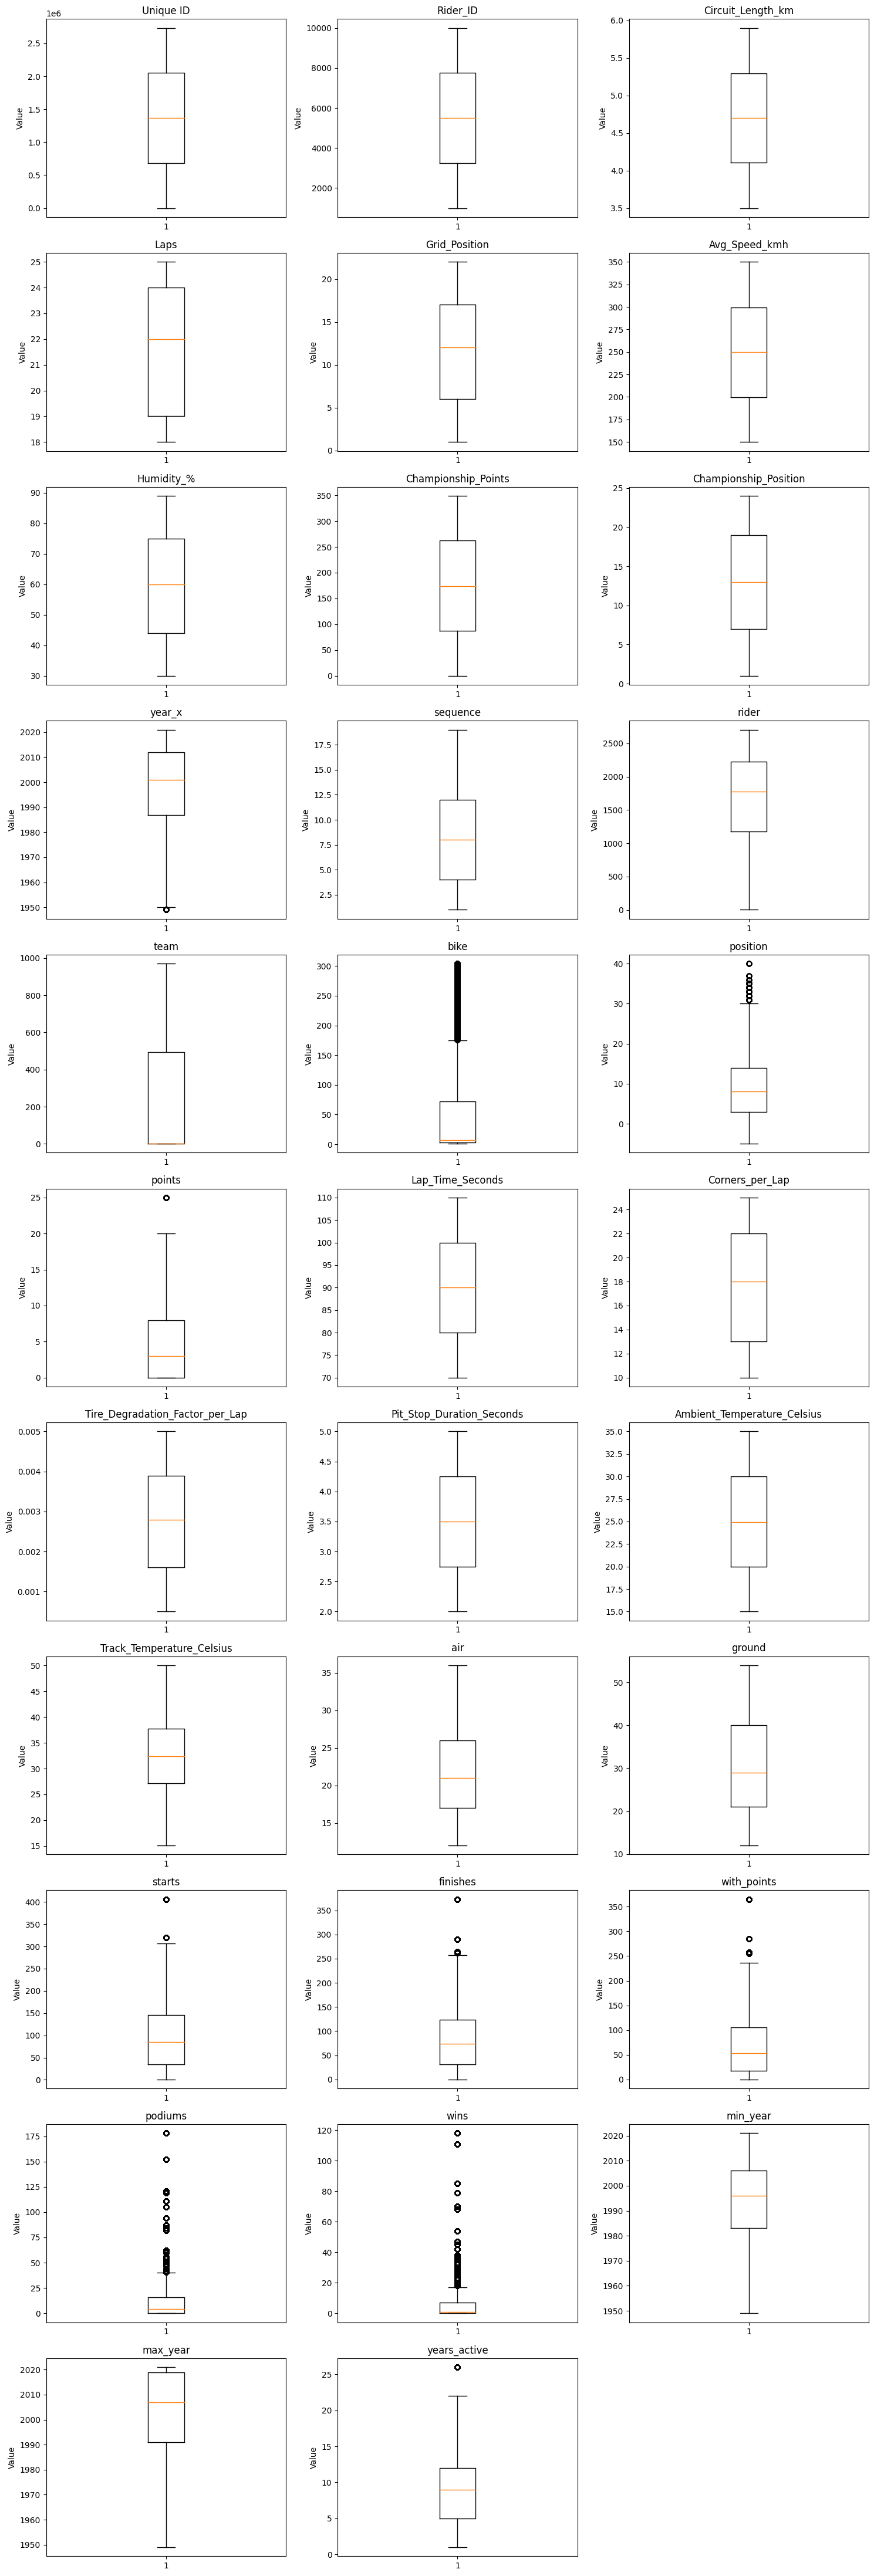

In [27]:
numerical_cols = train1_df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.ravel() if n_rows > 1 else [axes]

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(train1_df[col].dropna())
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Value')

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
train_df['Penalty']

0                   +3s
1                   +5s
2                   DNF
3                   DNS
4                   DNS
               ...     
1914051             DNS
1914052             +3s
1914053    Ride Through
1914054             DNF
1914055             NaN
Name: Penalty, Length: 1914056, dtype: object

In [9]:
with pd.option_context('display.max_columns', None):
    print(train_df.head())

   Unique ID  Rider_ID category_x  Circuit_Length_km  Laps  Grid_Position  \
0    1894944      2659      Moto2              4.874    22             17   
1      23438      5205      Moto2              3.875    24              7   
2     939678      7392      Moto3              5.647    25              5   
3    1196312      7894      Moto3              4.810    19              3   
4    1033899      6163     MotoGP              5.809    25             21   

   Avg_Speed_kmh Track_Condition  Humidity_% Tire_Compound_Front  \
0         264.66             Wet          61                Hard   
1         177.56             Wet          77                Soft   
2         317.74             Dry          87                Soft   
3         321.82             Wet          43                Soft   
4         239.92             Wet          47                Hard   

  Tire_Compound_Rear Penalty  Championship_Points  Championship_Position  \
0               Hard     +3s                  100   

In [10]:
print(train_df['category_x'].value_counts())

category_x
Moto2     640761
MotoGP    639313
Moto3     633982
Name: count, dtype: int64


In [11]:
team_means1 = train_df.groupby('circuit_name')['Lap_Time_Seconds'].mean()
team_means2 = train_df.groupby('shortname')['Lap_Time_Seconds'].mean()
team_means3 = train_df.groupby('team_name')['Lap_Time_Seconds'].mean()
team_means4 = train_df.groupby('rider_name')['Lap_Time_Seconds'].mean()
team_means5 = train_df.groupby('bike_name')['Lap_Time_Seconds'].mean()

In [12]:
def feature_engineering(df):
    df = pd.get_dummies(df, columns=['category_x'], prefix='moto', dtype=int)
    df = pd.get_dummies(df, columns=['Track_Condition'], prefix='Track_Condition', dtype=int,drop_first=True)
    df = pd.get_dummies(df, columns=['Tire_Compound_Rear'], prefix='rear_tire', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['Tire_Compound_Front'], prefix='front_tire', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['Penalty'], prefix='Penalty', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['Session'], prefix='Session', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['weather'], prefix='weather', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['track'], prefix='track', dtype=int, drop_first=True)
    team_means1 = df.groupby('circuit_name')['Lap_Time_Seconds'].mean()
    df['Circuit_name_encoded'] = df['circuit_name'].map(team_means1)
    team_means2 = df.groupby('shortname')['Lap_Time_Seconds'].mean()
    df['Short_name_encoded'] = df['shortname'].map(team_means2)
    team_means3 = df.groupby('team_name')['Lap_Time_Seconds'].mean()
    df['team_encoded'] = df['team_name'].map(team_means3)
    team_means4 = df.groupby('rider_name')['Lap_Time_Seconds'].mean()
    df['rider_name_encoded'] = df['rider_name'].map(team_means4)
    team_means5 = df.groupby('bike_name')['Lap_Time_Seconds'].mean()
    df['bike_name_encoded'] = df['bike_name'].map(team_means5)
    df=df.drop(["circuit_name","shortname","team_name","rider_name","bike_name",
                            "Unique ID","Rider_ID"],axis=1)
    return df
    
train_df = feature_engineering(train_df)
val_df = feature_engineering(val_df)

In [13]:
def feature_engineering(df):
    df = pd.get_dummies(df, columns=['category_x'], prefix='moto', dtype=int)
    df = pd.get_dummies(df, columns=['Track_Condition'], prefix='Track_Condition', dtype=int,drop_first=True)
    df = pd.get_dummies(df, columns=['Tire_Compound_Rear'], prefix='rear_tire', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['Tire_Compound_Front'], prefix='front_tire', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['Penalty'], prefix='Penalty', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['Session'], prefix='Session', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['weather'], prefix='weather', dtype=int, drop_first=True)
    df = pd.get_dummies(df, columns=['track'], prefix='track', dtype=int, drop_first=True)
    df['Circuit_name_encoded'] = df['circuit_name'].map(team_means1)
    df['Short_name_encoded'] = df['shortname'].map(team_means2)
    df['team_encoded'] = df['team_name'].map(team_means3)
    df['rider_name_encoded'] = df['rider_name'].map(team_means4)
    df['bike_name_encoded'] = df['bike_name'].map(team_means5)
    df=df.drop(["circuit_name","shortname","team_name","rider_name","bike_name",
                            "Unique ID","Rider_ID"],axis=1)
    return df

test_df = feature_engineering(test_df)

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_train = train_df.drop(['Lap_Time_Seconds'], axis=1)  # Remove target and original categorical columns
y_train = train_df['Lap_Time_Seconds']


X_val = val_df.drop(['Lap_Time_Seconds'], axis=1)
y_val = val_df['Lap_Time_Seconds']

In [16]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import AdamW
from tensorflow import keras
from tensorflow.keras import layers
model1 = keras.Sequential([
    layers.Input(shape=(57,)),
    layers.Dense(units=512,kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(1e-4),activation=None),
    layers.BatchNormalization(),
    #layers.Activation('relu'),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.1),
    layers.Dense(units=512,kernel_regularizer=regularizers.l2(1e-4),activation=None),
    layers.BatchNormalization(),
    #layers.Activation('relu'),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.1),
    layers.Dense(units=128,activation=None),
    layers.BatchNormalization(),
    #layers.Activation('relu'),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.1),
    layers.Dense(units=128,activation=None),
    layers.BatchNormalization(),
    #layers.Activation('relu'),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.1),
    layers.Dense(units=16,activation=None),
    layers.BatchNormalization(),
    #layers.Activation('relu'),
    layers.LeakyReLU(alpha=0.1),
   # layers.Dropout(0.1),
    layers.Dense(units=1, activation=None)
])
model1.compile(
    optimizer=AdamW(learning_rate=1e-3, weight_decay=1e-4),  # Lower learning rate
    loss='mse',
    metrics=['mae']
)

# More patient early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=25,           # Increased from 15
    min_delta=0.00001,     # Smaller threshold (was 0.0001)
    restore_best_weights=True,
    monitor='val_loss'
)

# More patient learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,            # Less aggressive reduction (was 0.7)
    patience=15,           # Increased from 10
    min_lr=1e-7,           # Lower minimum (was 1e-6)
    verbose=1
)
history1=model1.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    batch_size=1024,
    epochs=500,
    callbacks=[early_stopping,lr_scheduler],
    verbose=1
)

from sklearn.metrics import mean_squared_error

train_pred = model1.predict(X_train)
val_pred = model1.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 6105.9287 - mae: 75.5674 - val_loss: 249.2166 - val_mae: 12.8814 - learning_rate: 0.0010
Epoch 2/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 176.9756 - mae: 10.9630 - val_loss: 190.6011 - val_mae: 11.3499 - learning_rate: 0.0010
Epoch 3/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 125.9356 - mae: 9.5706 - val_loss: 126.3786 - val_mae: 9.5443 - learning_rate: 0.0010
Epoch 4/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 125.3230 - mae: 9.5441 - val_loss: 126.4254 - val_mae: 9.5652 - learning_rate: 0.0010
Epoch 5/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 124.8785 - mae: 9.5233 - val_loss: 128.1619 - val_mae: 9.6089 - learning_rate: 0.0010
Epoch 6/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 124.3188 - mae: 9.4978 - val_loss: 125.5987 - val_mae: 9.4997 - learning_rate: 0.0010
Epoch 7/500
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 123.3522 - mae: 9.4506 - val_loss: 12

In [17]:
sample_submission = pd.read_csv('/kaggle/input/burnout-datathon-ieeecsmuj/sample_submission.csv')

# Check the structure of sample submission
print("Sample submission structure:")
print(f"Shape: {sample_submission.shape}")
print(f"Columns: {sample_submission.columns.tolist()}")
print("\nFirst few rows:")
print(sample_submission.head())

Sample submission structure:
Shape: (546874, 2)
Columns: ['Unique ID', 'Lap_Time_Seconds']

First few rows:
   Unique ID  Lap_Time_Seconds
0     288307            70.667
1     704288           103.497
2     951491            78.400
3    2591721            81.338
4    1202653           108.626


In [18]:
id_column = sample_submission['Unique ID']

print(f"\nID column extracted:")
print(f"Column name: 'Unique ID'")
print(f"Number of IDs: {len(id_column)}")
print(f"First few IDs: {id_column.head().tolist()}")

# Generate predictions on your test data
# Make sure test_df has the same 57 features in the same order as training
test_predictions = model1.predict(test_df)

# Create submission using the exact same format as sample
submission = pd.DataFrame({
    'Unique ID': id_column,
    'Lap_Time_Seconds': test_predictions.flatten()
})

# Save submission
submission.to_csv('submission.csv', index=False)

print(f"\nSubmission created with columns: {submission.columns.tolist()}")
print("Submission saved as 'submission.csv'")


ID column extracted:
Column name: 'Unique ID'
Number of IDs: 546874
First few IDs: [288307, 704288, 951491, 2591721, 1202653]
17090/17090 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step

Submission created with columns: ['Unique ID', 'Lap_Time_Seconds']
Submission saved as 'submission.csv'
